# **Sales Data Deep Analysis - Knightbearr**

# **Introduction**


بسم الله الرحمن الرحيم

السلام عليكم ورحمة الله وبركاته

Hello fellow kagglers! My name is Azmi, this is my very first public notebook Deep Analysis that I made, please give me an upvote if you like it! and please, leave me your feedback or give me yor insight about this data, Hope you like it! In this notebook we're going to analyst Sales Data by doing so we're going to get some insights.

I'm planning to go through feature (question) by feature and take closer look those features to inspect their relationships with previous features. So it's gonna take a while to finish this notebook with all features involved. I'm planning to update it regulary whenever I have free time.

*Sorry if my English is bad :') hope you like it!*

## **Table of Contents:**

1. [Context](#1)
2. [Import Libraries](#2)
    1. [Merge the 12 months of sales data into a single CSV file](#3)
3. [Read in Updated Data Frame](#4)
4. [Data Preprocessing](#5)
    1. [Uniqueness Categorical Variables](#6)
    2. [How many missing data points do we have?](#7)
    3. [Figure out why the data is missing](#8)
    4. [Clean up the Data!](#9)
    5. [Convert Quantity Ordered column and Price Each column](#10)
    6. [Convert Order Date column](#11)
    7. [Recap Data](#12)
5. [Data Preparation](#13)
    1. [Add Month, Hour, Minute, Sales, Cities Column](#14)
6. [Data Analysis](#15)
    1. [Univariate Analysis](#16)
    2. [Task:](#17)
        1. [Q: What was the best Year for sales? How much was earned that Year?](#18)
        2. [Q: What was the best month for sales? How much was earned that month?](#19)
        3. [Q: What City had the highest number of sales?](#20)
        4. [Q: What time should we display adverstisement to maximize likelihood of customer's buying product?](#21)
        5. [Q: What products are most often sold together?](#22)
        6. [Q: What product sold the most? Why do you think it sold the most?](#23)
    3. [How Much Probability?](#24)
        1. [How much probability for next people will order USB-C Charging Cable?](#25)
        2. [How much probability for next people will order iPhone?](#26)
        3. [How much probability for next people will order Google Phone?](#27)
        4. [How much probability for next people will order Wired Headphones?](#28)
7. [Conclusion](#29)
8. [Inspiration](#30)

<a id="1"></a>

# **Context**

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

## **Content**

* `Order ID` - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* `Product` - The product that have been sold.
* `Quantity Ordered` - Ordered Quantity is the total item quantity ordered in the initial order (without any changes). 
* `Price Each` - The price of each products.
* `Order Date` - This is the date the customer is requesting the order be shipped. 
* `Purchase Address` - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

## **Target**

A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

## **Task:**

* Q: What was the best Year for sales? How much was earned that Year? 
* Q: What was the best month for sales? How much was earned that month? 
* Q: What City had the highest number of sales? 
* Q: What time should we display adverstisement to maximize likelihood of customer's buying product? 
* Q: What products are most often sold together? 
* Q: What product sold the most? Why do you think it sold the most? 

## **How Much Probability?**

* How much probability for next people will ordered USB-C Charging Cable? 
* How much probability for next people will ordered iPhone? 
* How much probability for next people will ordered Google Phone? 
* How much probability other peoples will ordered Wired Headphones? 

<a id="2"></a>
*Let's get started...*

# **Import Necessary Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 25)
pd.set_option("display.max_rows", 25)

<a id="3"></a>

### **Merge the 12 months of sales data into a single CSV file**

In [2]:
# let's make a list compreension for all the data in the folder
files = [file for file in os.listdir('../input/sales-product-data')] 
# let's make a pandas DataFrame
all_months_data = pd.DataFrame()
# makes a loop for concat the data
for file in files:
    data = pd.read_csv("../input/sales-product-data/" + file)
    all_months_data = pd.concat([all_months_data, data])
# export all data to csv    
all_months_data.to_csv("all_data.csv", index=False)

<a id="4"></a>

# **Read in updated DataFrame**

Let's see the data and how it looks.

In [3]:
sales_data = pd.read_csv('all_data.csv') # read data
sales_data # show data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [4]:
"Head"
sales_data.head() # Checking the first 5 rows of data
"Tail"
sales_data.tail() # Checking the last 5 rows of data

'Head'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


'Tail'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


Yep, it looks like there's some missing values. 

<a id="5"></a>

# **Data Preprocessing**

Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.

In [5]:
# getting the information 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


<a id="6"></a>

### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [6]:
categorical = sales_data.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, sales_data[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


<a id="7"></a>
### **How many missing data points do we have?**

Ok, now we know that we do have some missing values. Let's see how many we have in each column. 

In [7]:
# get the number of missing data points per column
missing_values_count = sales_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [8]:
# how many total missing values do we have?
total_cells = np.product(sales_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

0.29167781643029167


Looks like the percent missing of the data is not too big.
<a id="8"></a>
### **Figure out why the data is missing**
This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important questions you can ask yourself to help figure this out is this:

> **Is this value missing because it wasn't recorded or because it doesn't exist?**

If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation.

But, since this missing value is not too big, let's just drop the missing value, I think this will not affect the data since the data is big enough.

<a id="9"></a>

### **Clean up the Data!**

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

In [9]:
# let's drop the rows of NaN data!
sales_data = sales_data.dropna(how='all')
# okay, let's check it again!
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]
# future warning! ValueError: invalid literal for int() with base 10: 'Or'
"Clean Future Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

'NaN Value:'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


'Clean Future Warnings:'

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


<a id="10"></a>

### **Convert Quantity Ordered column and Price Each column**

Let's convert the Quantity Ordered column and Price Each column to Numeric Type, because we will add some future features, and we need to multiply this two column.

In [10]:
# convert the data
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')
# and check it 
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


<a id="11"></a>

### **Convert Order Date column**

And let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [11]:
# convert it using to_datetime() funct
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
# let's see it
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


<a id="12"></a>

### **Recap Data**

This is some point that we have.

* We have total $186850$ records and $6$ columns cateogircal type <br>
* The total of missing value that we have is $0.29167$% <br>
* Order ID : $178438$ unique value(s) <br>
* Product : $20$ unique value(s) <br>
* Quantity Ordered : $10$ unique value(s) <br>
* Price Each : $24$ unique value(s) <br>
* Order Date : $142396$ unique value(s) <br>
* Purchase Address : $140788$ unique value(s) <br>

<br>

Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

<a id="13"></a>

# **Data Preparation**

Data preparation is the act of manipulating raw data into a form that can readily and accurately be analysed, e.g. for business purposes. Data Preparation is a pre-processing step in which data from one or more sources is cleaned and transformed to improve its quality prior to its use in business analytics.

<a id="14"></a>

### **Add Month, Hour, Minute, Sales, Cities Column**

In [12]:
def augment_data(data):
    
    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column
    
    Returning:
        data with new features
    """
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data # returning data

# and see it
sales_data = augment_data(sales_data)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,20,58,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,12,1,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,6,43,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,10,39,11.99,Dallas (TX)


<a id="15"></a>

# **Data Analysis**

Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase (Savenye, Robinson, $2004$).
analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

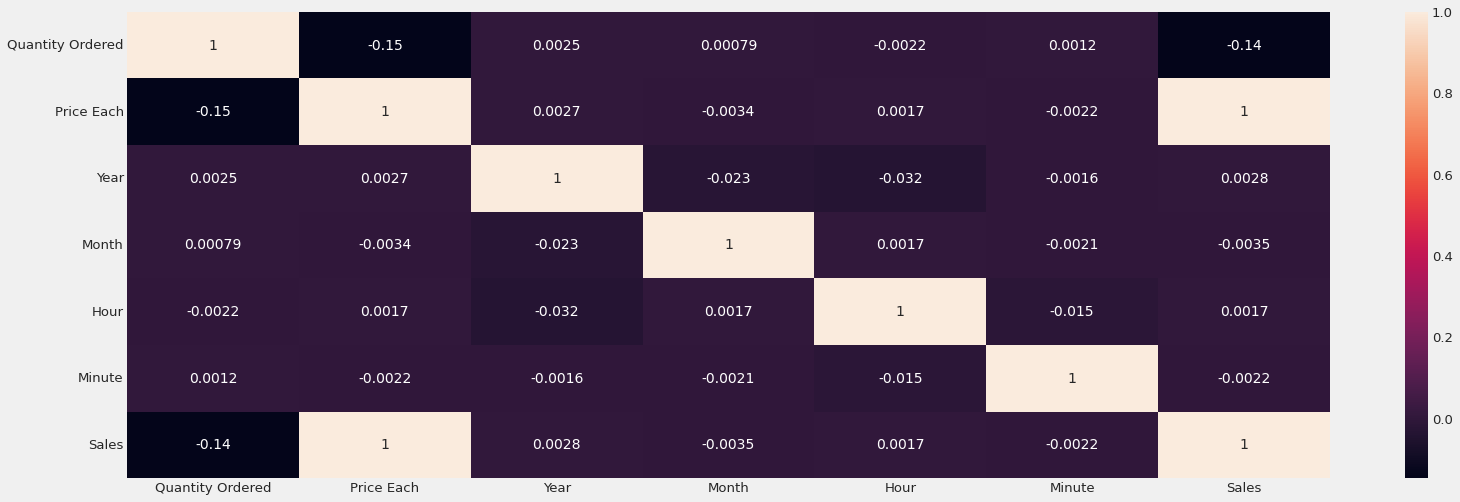

In [13]:
# let's make a correlation matrix
plt.figure(figsize=(24, 8))
sns.heatmap(sales_data.corr(), annot=True);

In [14]:
sales_data.corr()['Sales'].sort_values(ascending=False) # the correlation

Sales               1.000000
Price Each          0.999203
Year                0.002824
Hour                0.001668
Minute             -0.002162
Month              -0.003466
Quantity Ordered   -0.139417
Name: Sales, dtype: float64

In [15]:
# statistical measure of sales data without object type of data
sales_data_numeric = sales_data.describe(include=[np.number]) 
# statistical measure of sales data without numeric type of data
sales_data_object = sales_data.describe(exclude=[np.number])
"Statistical Measure of Sales Data in Numeric Data"
sales_data_numeric
"Statistical Measure of Sales Data in Object / Str Data"
sales_data_object

'Statistical Measure of Sales Data in Numeric Data'

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


'Statistical Measure of Sales Data in Object / Str Data'

,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,142395,140787,10
top,160873,USB-C Charging Cable,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,5,21903,8,9,44732
first,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


<a id="16"></a>

## **Univariate Analysis**

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

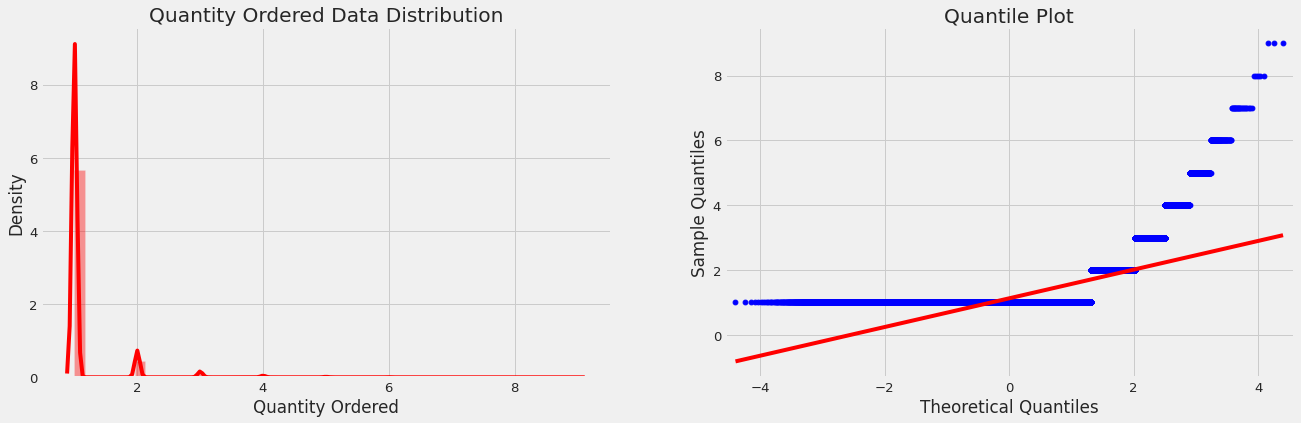

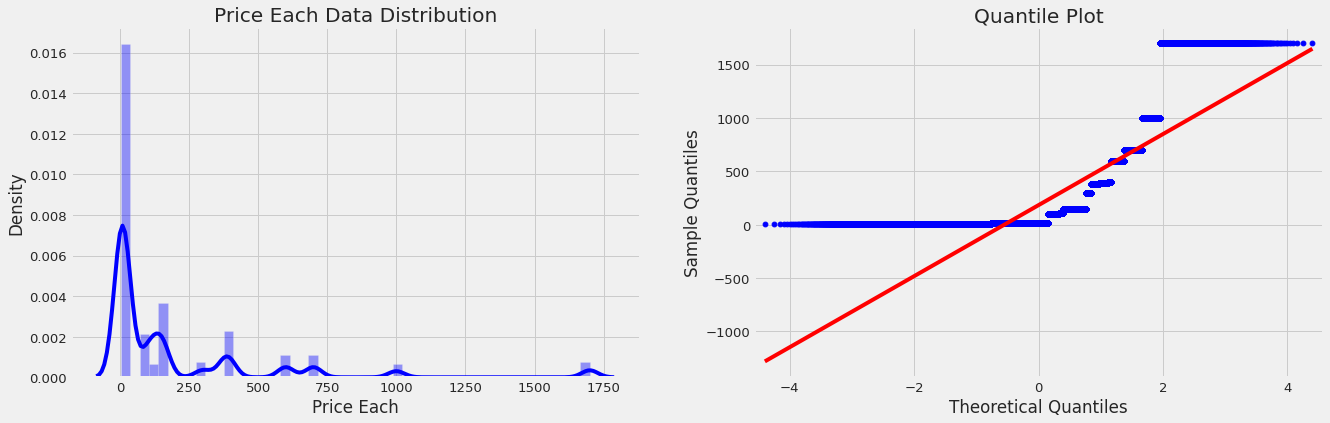

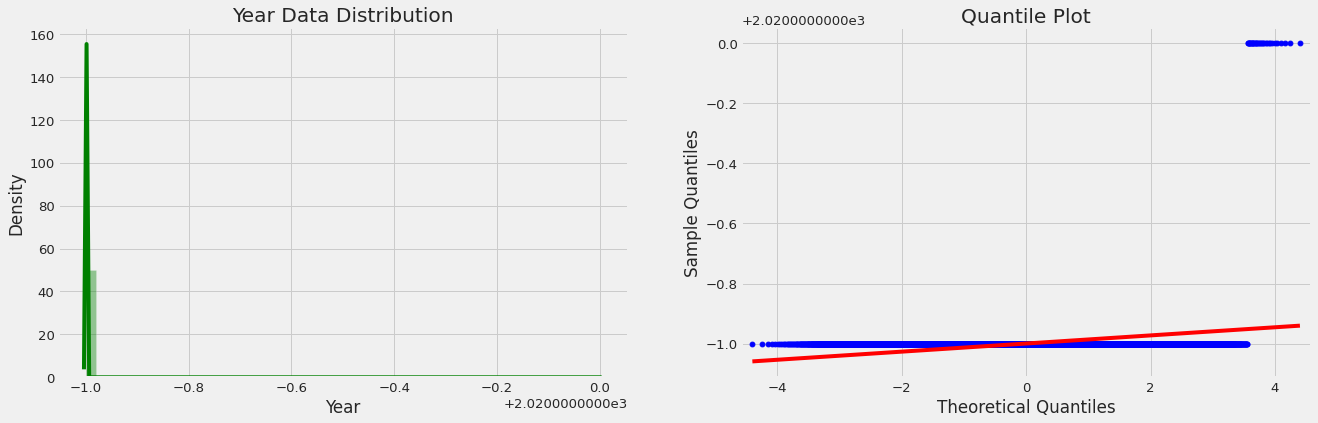

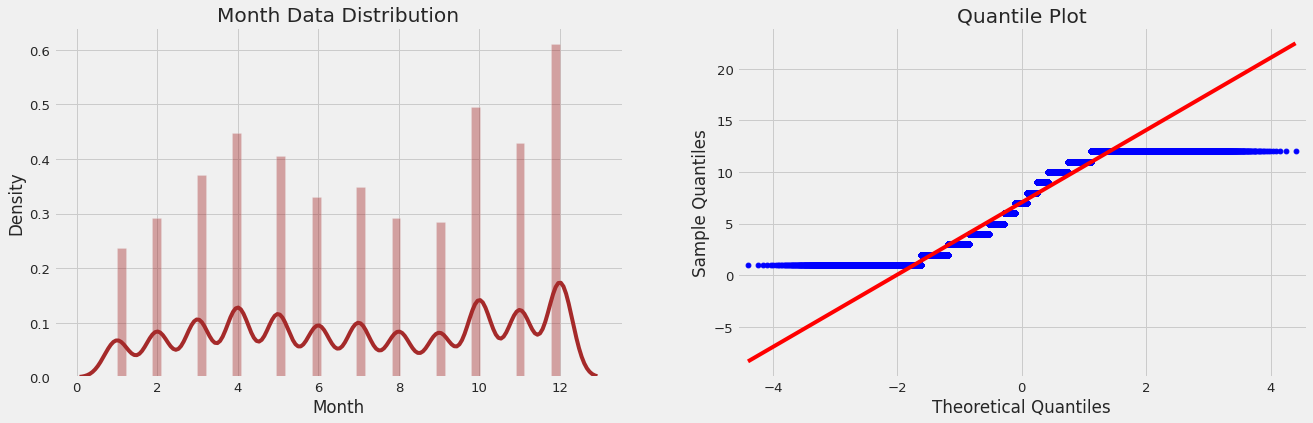

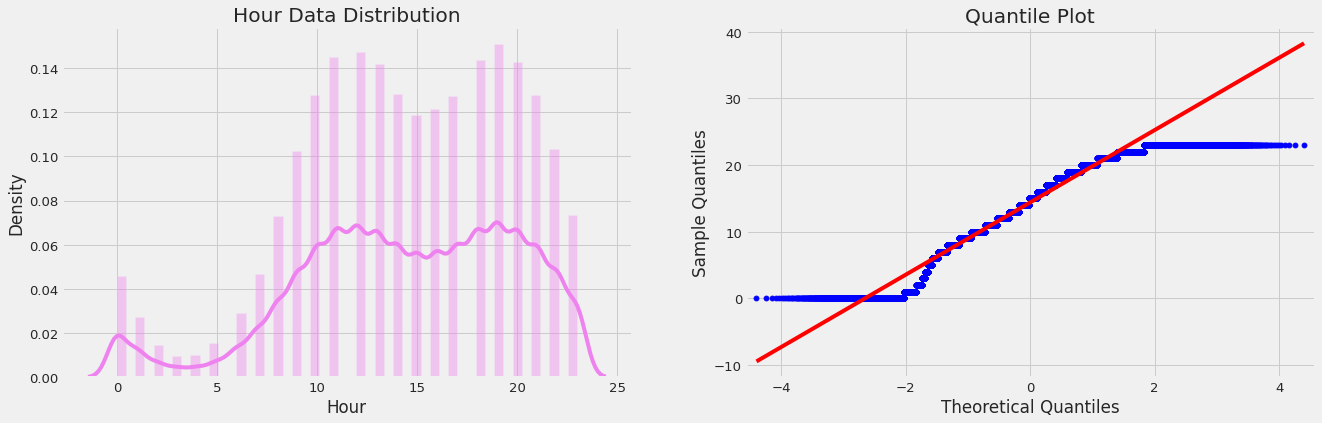

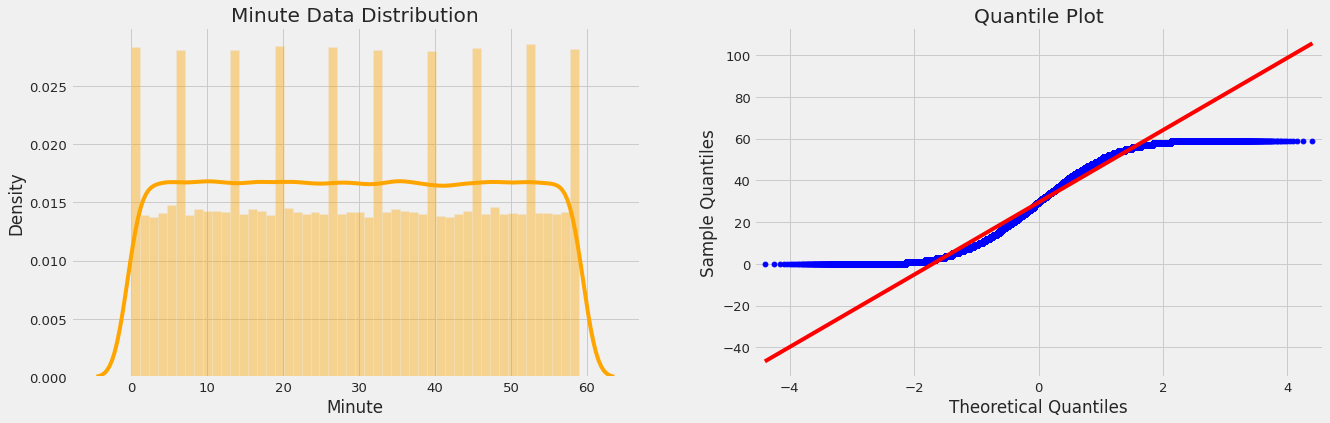

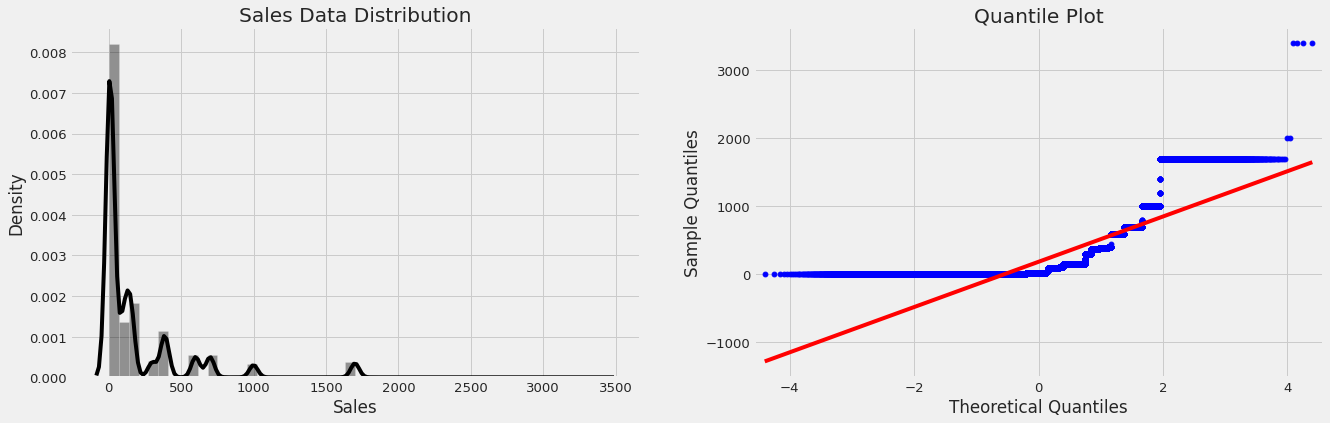

In [16]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set(title=title1) # set the title 1
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set(title=title2) # set the title 2
    
    return fig # returning the figure

# Quantity Ordered Data
univariate_analysis( # call the function
    data=sales_data['Quantity Ordered'], # put the data
    color='red', # pick the color
    title1='Quantity Ordered Data Distribution', # title1
    title2='Quantile Plot' # title2
);
# Price Each Data
univariate_analysis( # call the function
    data=sales_data['Price Each'], # put the data
    color='blue', # pick the color 
    title1='Price Each Data Distribution', # title1 
    title2='Quantile Plot' # title2
);
# Year Data
univariate_analysis( # call the function
    data=sales_data['Year'], # put the data
    color='green', # pick the color
    title1='Year Data Distribution', # title1 
    title2='Quantile Plot' # title2
);
# Month Data
univariate_analysis( # call the function
    data=sales_data['Month'], # put the data 
    color='brown', # pick the color
    title1='Month Data Distribution', # title1 
    title2='Quantile Plot' # title2
);
# Hour Data
univariate_analysis( # call the function
    data=sales_data['Hour'], # put the data 
    color='violet', # pick the color
    title1='Hour Data Distribution', # title1 
    title2='Quantile Plot' # title2
);
# Minute Data
univariate_analysis( # call the function
    data=sales_data['Minute'], # put the data 
    color='orange', # pick the color 
    title1='Minute Data Distribution', # title1 
    title2='Quantile Plot' # title2
);
# Sales Data
univariate_analysis( # call the function
    data=sales_data['Sales'], # put the data 
    color='black', # pick the color
    title1='Sales Data Distribution', # title1 
    title2='Quantile Plot' # title2
);

In [17]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False)
skew_value

Year                73.933795
Quantity Ordered     4.833164
Sales                2.881913
Price Each           2.872149
Minute               0.002580
Order ID             0.000719
Month               -0.088588
Hour                -0.530377
dtype: float64

It can be seen that most of the data we have are in the form of a normal distribution, and there are two skewed data.

<a id="17"></a>

## **Task:**

<a id="18"></a>

### **Q: What was the best Year for sales? How much was earned that Year?**

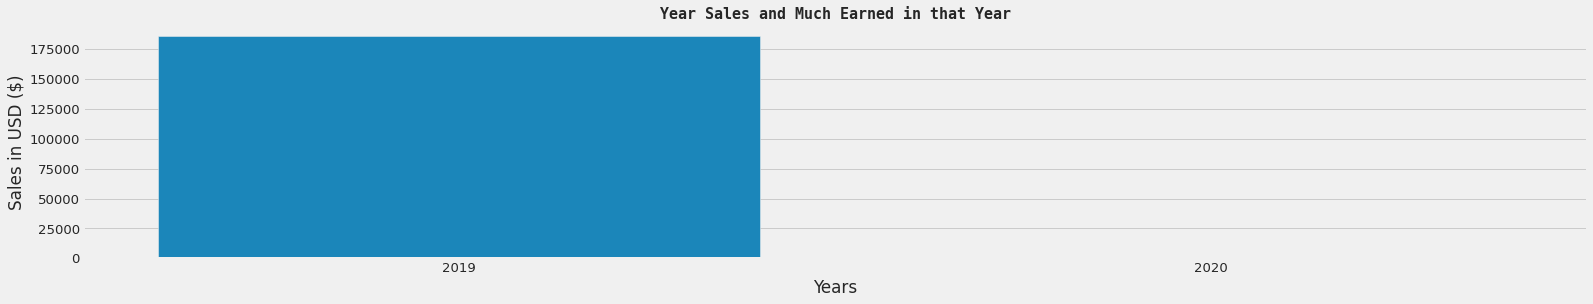

In [18]:
# let's plot it
plt.figure(figsize=(24, 4)) # figuring the size
# makes count plot 
sns.countplot(x='Year', data=sales_data)
# title
plt.title('Year Sales and Much Earned in that Year', 
          fontname='monospace', fontweight='bold', fontsize=15
)
# x-label
plt.xlabel('Years')
# y-label
plt.ylabel('Sales in USD ($)');

In [19]:
sales_data.groupby(['Year']).sum().astype('int')

,Quantity Ordered,Price Each,Month,Hour,Minute,Sales
Year,,,,,,
2019,209038,34280627,1312613,2680102,5481128,34483365
2020,41,8503,34,52,931,8670


#### **Answer:**

When viewed from the data above, $2019$ was the best year that had the highest number of sales, which was $34,483,365$, compared to $2020$ which only had $8,670$ in sales, this is due to the lack of data in $2020$ which caused a data imbalance.

<a id="19"></a>

### **Q: What was the best month for sales? How much was earned that month?**

In [20]:
sales_data.groupby(['Month']).sum().astype('int')

,Quantity Ordered,Price Each,Year,Hour,Minute,Sales
Month,,,,,,
1,10903,1811768,19602505,139485,282440,1822256
2,13449,2188884,24177525,172669,354885,2202022
3,17005,2791207,30593907,218969,447559,2807100
4,20558,3367671,36905301,262259,544186,3390670
5,18667,3135125,33446754,238780,487899,3152606
6,15253,2562025,27365526,195528,402436,2577802
7,16072,2632539,28857567,206169,417349,2647775
8,13448,2230345,24149259,172289,353857,2244467
9,13109,2084992,23462799,168513,341698,2097560


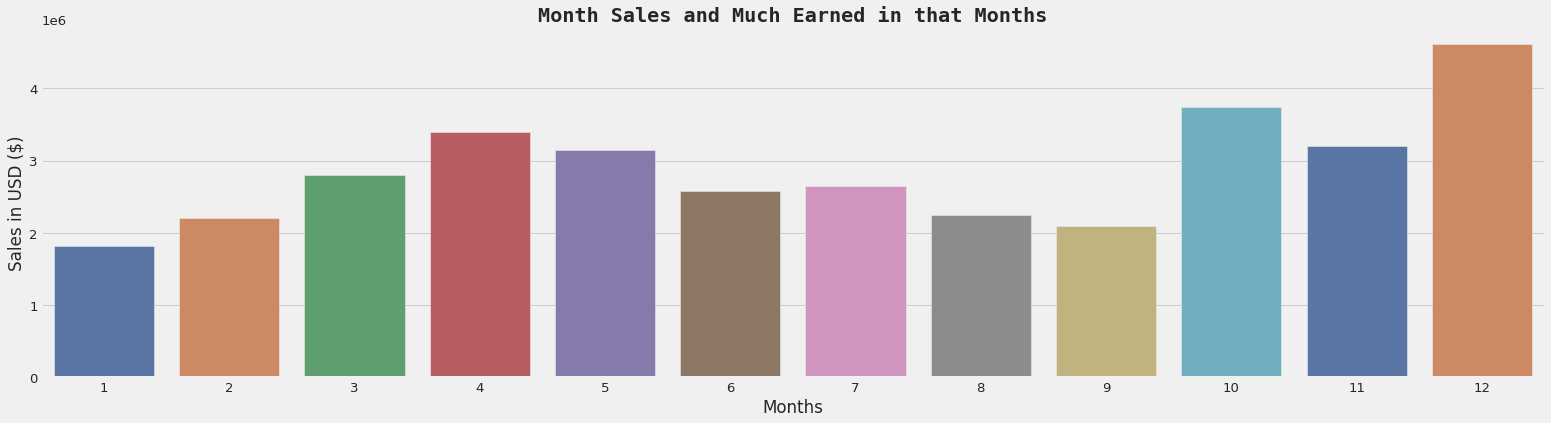

In [21]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 6)) # figuring the size
# makes bar plot 
sns.barplot(
    x=sum_of_month_and_earned.index, 
    y=sum_of_month_and_earned['Sales'], 
    data=sum_of_month_and_earned, palette='deep'
)
# title
plt.title('Month Sales and Much Earned in that Months', 
          fontname='monospace', weight='bold'
)
# x-label
plt.xlabel('Months')
# y-label
plt.ylabel('Sales in USD ($)');

#### **Answer:**

The best month to sell is shown in the visualization above is December which has a record number of sales reaching $4,613,443$$, sales. This may be because in December there is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones.

<a id="20"></a>

### **Q: What City had the highest number of sales?**

In [22]:
sales_data.groupby(['Cities']).sum().astype('int')

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
Cities,,,,,,,
Atlanta (GA),16602,2779908,30044739,104794,214264,442932,2795498
Austin (TX),11153,1809873,19998197,69829,141946,289060,1819581
Boston (MA),22528,3637409,40246750,141112,288225,590442,3661642
Dallas (TX),16730,2752627,29921582,104620,214390,435155,2767975
Los Angeles (CA),33289,5421435,59772496,208325,427444,866638,5452570
New York City (NY),27932,4635370,50224654,175741,357696,733598,4664317
Portland (ME),2750,447189,4956645,17144,35211,72856,449758
Portland (OR),11303,1860558,20210192,70621,144421,295533,1870732
San Francisco (CA),50239,8211461,90313920,315520,643265,1319477,8262203


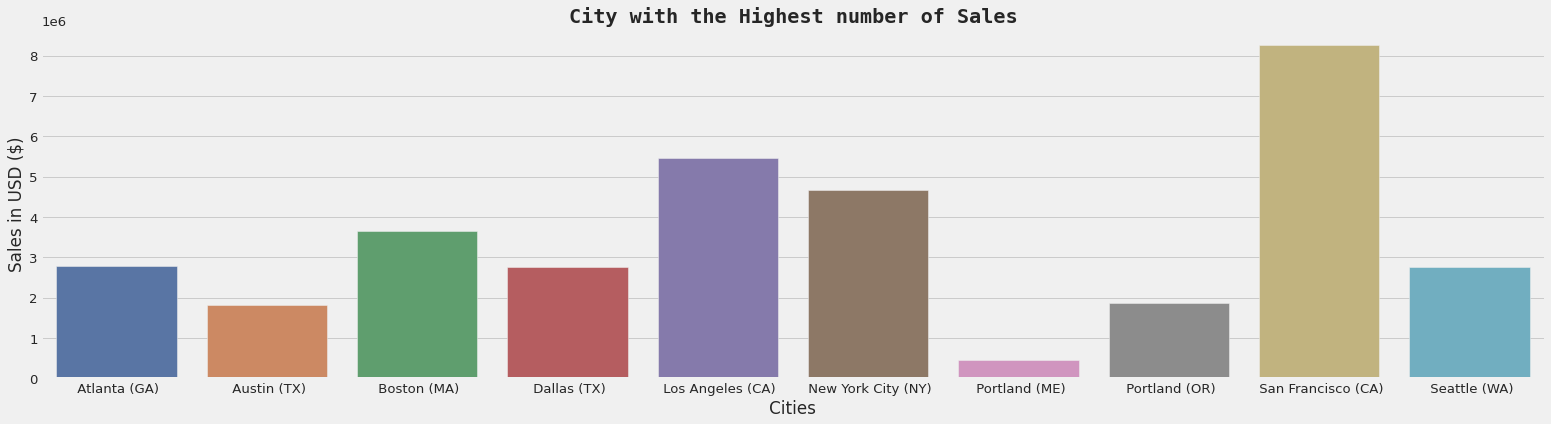

In [23]:
# group of the highest number of sales in city
highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 6)) # figuring the size
# makes bar plot 
sns.barplot(
    x=highest_number_of_sales.index, 
    y=highest_number_of_sales['Sales'], 
    data=highest_number_of_sales, palette='deep'
)
# title
plt.title(
    'City with the Highest number of Sales', 
    fontname='monospace', weight='bold'
)
# x-label
plt.xlabel('Cities')
# y-label
plt.ylabel('Sales in USD ($)');

#### **Answer:**

The city that has the most sales data in the above visualization is San Francisco, with total sales reaching $8,262,203$$

<a id="21"></a>

### **Q: What time should we display adverstisement to maximize likelihood of customer's buying product?**

In [24]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)


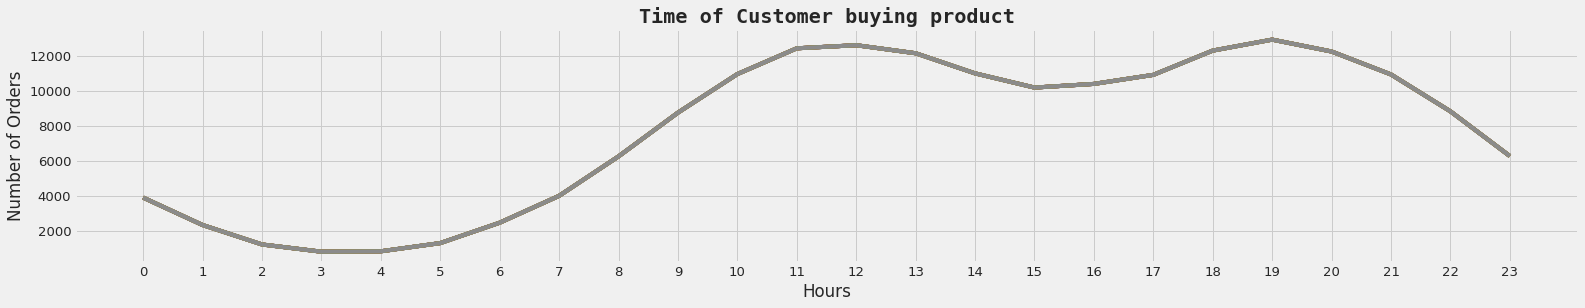

In [25]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in sales_data.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 4)) # figuring the size
# makes bar plot 
plt.plot(hours, sales_data.groupby(['Hour']).count())
# xticks
plt.xticks(hours)
# let's add grid
plt.grid(True)
# title
plt.title(
    'Time of Customer buying product', 
    fontname='monospace', weight='bold'
)
# x-label
plt.xlabel('Hours')
# y-label
plt.ylabel('Number of Orders');

#### **Answer:**

My recommendation if you want to place an ad, place the ad at $9$ am or $10$ am, because there is an increase in the number of orders at that time.

<a id="22"></a>

### **Q: What product sold the most? Why do you think it sold the most?**

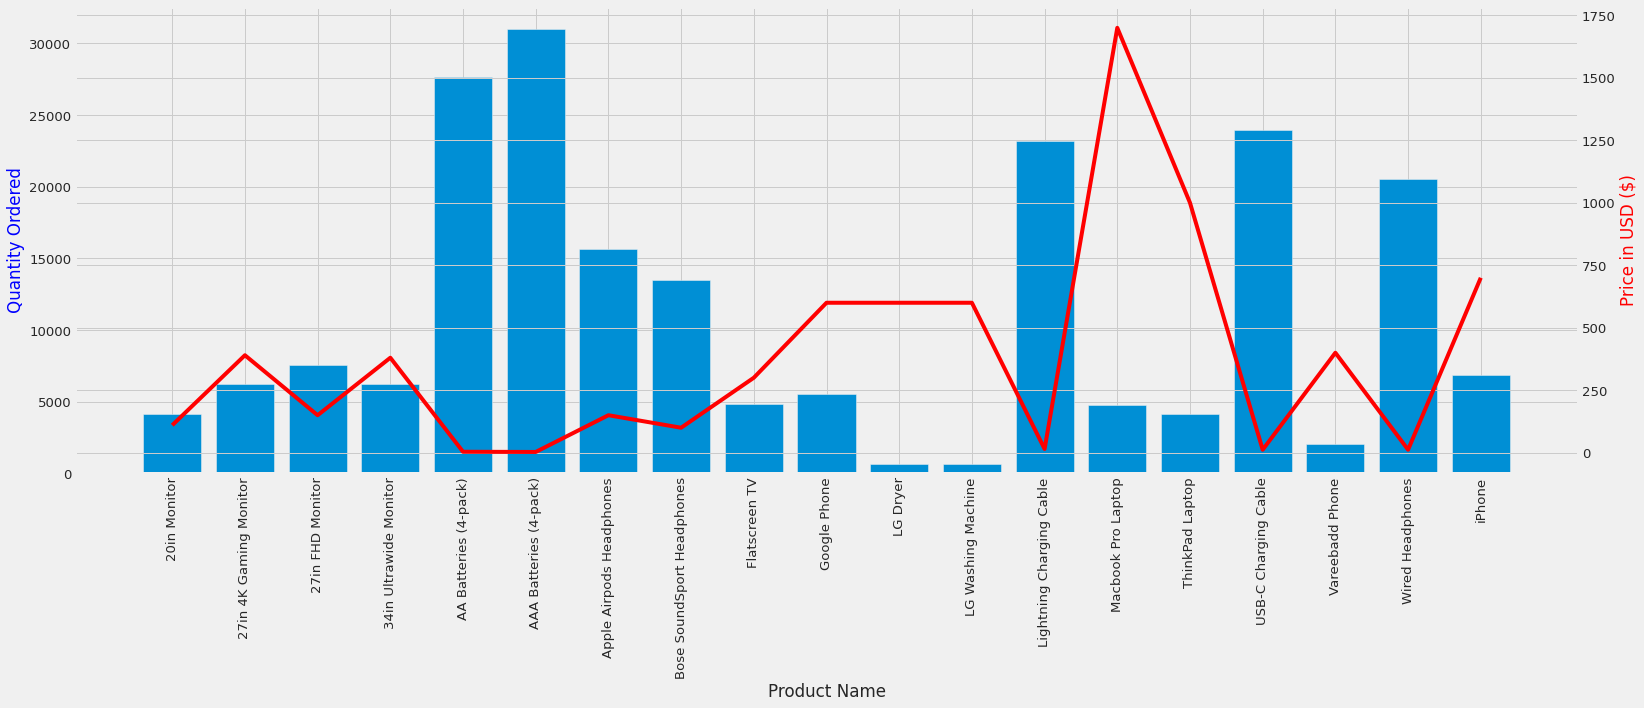

In [26]:
# lets prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""
# let's make a subplots
fig, ax1 = plt.subplots(figsize=(24, 8))
ax2 = ax1.twinx()
# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.set_xticklabels(products, rotation='vertical')
# AXES 2
ax2.plot(products, prices, 'r-')
ax2.set_ylabel('Price in USD ($)', color='r');

#### **Answer:**

The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products have a low price compared to other products, for example, the LG Dryer, or the LG Washing Machine, which have a price of around $500-700$$.

<a id="23"></a>

### **Q: What products are most often sold together?**

In [27]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### **Answer:**

Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold $1005$ orders, and Google Phone, USB-C Charging Cable ranked second with $987$ orders.

In [28]:
sales_data.Product.value_counts().to_frame().T

,USB-C Charging Cable,Lightning Charging Cable,AAA Batteries (4-pack),AA Batteries (4-pack),Wired Headphones,Apple Airpods Headphones,Bose SoundSport Headphones,27in FHD Monitor,iPhone,27in 4K Gaming Monitor,34in Ultrawide Monitor,Google Phone,Flatscreen TV,Macbook Pro Laptop,ThinkPad Laptop,20in Monitor,Vareebadd Phone,LG Washing Machine,LG Dryer
Product,21903,21658,20641,20577,18882,15549,13325,7507,6842,6230,6181,5525,4800,4724,4128,4101,2065,666,646


<a id="24"></a>

## **How Much Probability?**

#### **Formula:**

$P(E) = \frac{Frequency Event E}{Total Frequency}$

#### **Rule of Complementary Events:**

$P(E) + P(E') = 1$ <br>
$P(E) = 1 - P(E')$ <br>
$P(E') = 1 - P(E)$

In [29]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = sales_data.Product.value_counts().sum() 

<a id="25"></a>

### **How much probability for next people will order USB-C Charging Cable?**

In [30]:
usb_charging = sales_data[sales_data.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


#### **Answer**

The probability for next people will order USB-C Charging Cable is $12$%, Because there are only $12$% chance we can say this an **unusual event**.

<a id="26"></a>

### **How much probability for next people will order iPhone?**

In [31]:
iphone = sales_data[sales_data.Product == 'iPhone'].value_counts().sum()
# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


#### **Answer**

The probability for next people will order iPhone is $4$%, Because there are only $4$% chance we can say this an **unusual event**.

<a id="27"></a>

### **How much probability for next people will order Google Phone?**

In [32]:
google_phone = sales_data[sales_data.Product == 'Google Phone'].value_counts().sum()
# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%


#### **Answer**

The probability for next people will order Google Phone is $3$%, Because there are only $3$% chance we can say this an **unusual event**.

<a id="28"></a>

### **How much probability for next people will order Wired Headphones?**

In [33]:
wired_headphones = sales_data[sales_data.Product == 'Wired Headphones'].value_counts().sum()
# Calculating Wired Headphones Probability
P_wired_headphones = statistical_probability(wired_headphones, product)
Pprime_wired_headphones = 1 - P_wired_headphones
print('Probability for next people will order Wired Headphones: %.2f%%' % P_wired_headphones)
print('Probability for next people will not order Wired Headphones: %.2f%%' % Pprime_wired_headphones)

Probability for next people will order Wired Headphones: 0.10%
Probability for next people will not order Wired Headphones: 0.90%


#### **Answer**

The probability for next people will order Wired Headphones is $10$%, Because there are only $10$% chance we can say this an **unusual event**.

<a id="29"></a>

# **Conclusion**

$2019$ was the best year that had the most sales, which was $34,483,365$ USD, compared to $2020$ which only had $8,670$ USD. this is due to data shortage in $2020$ which causes data imbalance, I need $2020$ data to be able to continue this data analysis. The best month to sell if shown in the visualization above is December which has a record number of sales reaching $4,613,443$ USD, sales. This may be because December is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones. The city that has the most sales data in the above visualization is the city of San Francisco, with total sales reaching $8,262,203$ USD. 

My recommendation if you want to place an ad, place the ad at $9$ am or $10$ am, because there is an increase in the number of orders at that time. Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold $1005$ orders, and Google Phone, USB-C Charging Cable ranked second with $987$ orders. The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. Why do these products sell more than others? This is because the prices of the most ordered products are cheaper than other products, for example the LG Dryer, or the LG Washing Machine, which costs around $500-700$ USD.

<a id="30"></a>

# **Inspiration**

* [https://www.youtube.com/watch?v=eMOA1pPVUc4&t=1498s](https://www.youtube.com/watch?v=eMOA1pPVUc4&t=1498s)
* [https://www.kaggle.com/alexisbcook/handling-missing-values](https://www.kaggle.com/alexisbcook/handling-missing-values)

# **Thank you for reading!**

### **More Updates ASAP!**